<a href="https://colab.research.google.com/github/shahidulislam1/FakeAndRealNewsDetection/blob/main/fake_and_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 


Mounted at /content/drive


In [ ]:
import os
import numpy as np 
import pandas as pd 
import re 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [ ]:
for dirname, _, filenames in os.walk("/content/drive/MyDrive/cse445/fake-and-real-news-dataset/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/cse445/fake-and-real-news-dataset/Fake.csv
/content/drive/MyDrive/cse445/fake-and-real-news-dataset/True.csv


In [ ]:
datasetFake = pd.read_csv("/content/drive/MyDrive/cse445/fake-and-real-news-dataset/Fake.csv")
datasetTrue = pd.read_csv("/content/drive/MyDrive/cse445/fake-and-real-news-dataset/True.csv")

In [ ]:
print("Fake news:   ", datasetFake.shape)
print("True news:   ",datasetTrue.shape)

Fake news:    (23481, 4)
True news:    (21417, 4)


In [ ]:
datasetFake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
datasetTrue.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
datasetTrue["label"] = 0
datasetFake["label"] = 1

In [ ]:
datasetTrue.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
dataset = pd.concat([datasetFake, datasetTrue], axis=0)  #concatenation 
dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
dataset= dataset.sample(frac=1.0, random_state=0)
dataset

,title,text,subject,date,label
11824,Ex-Interpol chief says ready to testify for Ar...,BUENOS AIRES (Reuters) - Argentina s previous ...,worldnews,"December 20, 2017",0
5699,U.S. warns North Korea of 'overwhelming' respo...,SEOUL (Reuters) - U.S. President Donald Trump’...,politicsNews,"February 3, 2017",0
6324,Big security risks in Trump feud with spy agen...,WASHINGTON (Reuters) - An unprecedented pre-pr...,politicsNews,"January 13, 2017",0
14756,France puts suspected militant under investiga...,PARIS (Reuters) - A suspected Islamist militan...,worldnews,"November 15, 2017",0
5099,Rudy Giuliani Turns Into A Blithering Idiot W...,During a live CNN interview with Rudy Giuliani...,News,"August 11, 2016",1
...,...,...,...,...,...
6922,Trump to meet with retired U.S. Admiral Stavri...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"December 5, 2016",0
21243,HELL FREEZES OVER…Or Does It? [Video] Hundreds...,It only took what 14 years for this to happen?...,left-news,"Dec 8, 2015",1
19132,U.S.-backed SDF say attacked by Russian jets i...,BEIRUT (Reuters) - U.S.-backed Syrian militias...,worldnews,"September 25, 2017",0
20086,"EU: spot checks show confusion, not conspiracy...",NAIROBI (Reuters) - Observers found some techn...,worldnews,"September 14, 2017",0


In [ ]:
dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
dataset['content'] = dataset['subject']+' '+ dataset['title']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 11824 to 2732
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   content  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


In [ ]:
import seaborn as sns

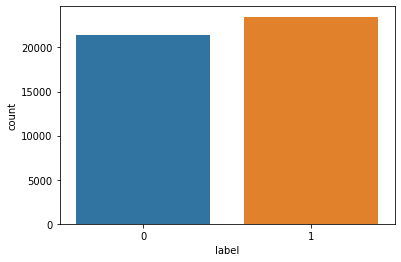

In [ ]:
sns.countplot(x='label',data=dataset)

In [ ]:
dataset.nunique()

title      38729
text       38646
subject        8
date        2397
label          2
content    44576
dtype: int64

In [ ]:
data = dataset.drop(columns='label', axis=1) 
label = dataset['label']

In [ ]:
print(data)
print('---------------------------- label -------------------------------')
print(label)

                                                   title  \
11824  Ex-Interpol chief says ready to testify for Ar...   
5699   U.S. warns North Korea of 'overwhelming' respo...   
6324   Big security risks in Trump feud with spy agen...   
14756  France puts suspected militant under investiga...   
5099    Rudy Giuliani Turns Into A Blithering Idiot W...   
...                                                  ...   
6922   Trump to meet with retired U.S. Admiral Stavri...   
21243  HELL FREEZES OVER…Or Does It? [Video] Hundreds...   
19132  U.S.-backed SDF say attacked by Russian jets i...   
20086  EU: spot checks show confusion, not conspiracy...   
2732    Trump’s Muslim Ban Protects America By Separa...   

                                                    text       subject  \
11824  BUENOS AIRES (Reuters) - Argentina s previous ...     worldnews   
5699   SEOUL (Reuters) - U.S. President Donald Trump’...  politicsNews   
6324   WASHINGTON (Reuters) - An unprecedented pre-pr... 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
porter = PorterStemmer()
def stemmingFUN (data):
    stemmed_data= re.sub('[^a-zA-Z]', ' ', data) # ^ : not  
    stemmed_data = stemmed_data.lower()
    stemmed_data = stemmed_data.split()
    # port_stem(word): to reduce the word 
    stemmed_data = [porter.stem(word) for word in stemmed_data if not word in stopwords.words('english')]
    stemmed_data = ' '.join(stemmed_data)
    return stemmed_data

In [ ]:
dataset['content'] = dataset['content'].apply(stemmingFUN)

In [ ]:
dataset['content']

11824    worldnew ex interpol chief say readi testifi a...
5699     politicsnew u warn north korea overwhelm respo...
6324     politicsnew big secur risk trump feud spi agen...
14756    worldnew franc put suspect milit investig kidn...
5099     news rudi giuliani turn blither idiot confront...
                               ...                        
6922     politicsnew trump meet retir u admir stavridi ...
21243    left news hell freez video hundr muslim dearbo...
19132    worldnew u back sdf say attack russian jet eas...
20086    worldnew eu spot check show confus conspiraci ...
2732     news trump muslim ban protect america separ ba...
Name: content, Length: 44898, dtype: object

In [ ]:
dataset.head(5)

,title,text,subject,date,label,content
11824,Ex-Interpol chief says ready to testify for Ar...,BUENOS AIRES (Reuters) - Argentina s previous ...,worldnews,"December 20, 2017",0,worldnew ex interpol chief say readi testifi a...
5699,U.S. warns North Korea of 'overwhelming' respo...,SEOUL (Reuters) - U.S. President Donald Trump’...,politicsNews,"February 3, 2017",0,politicsnew u warn north korea overwhelm respo...
6324,Big security risks in Trump feud with spy agen...,WASHINGTON (Reuters) - An unprecedented pre-pr...,politicsNews,"January 13, 2017",0,politicsnew big secur risk trump feud spi agen...
14756,France puts suspected militant under investiga...,PARIS (Reuters) - A suspected Islamist militan...,worldnews,"November 15, 2017",0,worldnew franc put suspect milit investig kidn...
5099,Rudy Giuliani Turns Into A Blithering Idiot W...,During a live CNN interview with Rudy Giuliani...,News,"August 11, 2016",1,news rudi giuliani turn blither idiot confront...


In [ ]:
data= dataset['content'].values
label = dataset['label'].values

In [ ]:
Vector = TfidfVectorizer()
Vector.fit(data)
data = Vector.transform(data)

In [ ]:
print(data)

  (0, 13018)	0.12120795097018898
  (0, 11654)	0.3498607075541588
  (0, 10146)	0.16517207076443285
  (0, 9399)	0.31453651141700956
  (0, 5961)	0.4694031620757602
  (0, 4242)	0.4694031620757602
  (0, 3971)	0.2849994970194253
  (0, 2016)	0.2622869316466853
  (0, 550)	0.3820906738052045
  (1, 12758)	0.3136812166662046
  (1, 12464)	0.2973236725706917
  (1, 9692)	0.32570458648425693
  (1, 8856)	0.13591299969522866
  (1, 8350)	0.549626515816145
  (1, 8015)	0.3240385342964538
  (1, 7970)	0.27255579030543503
  (1, 6432)	0.27901324493135765
  (1, 563)	0.3597521071842586
  (2, 12011)	0.12174530090064682
  (2, 10942)	0.36929632647382443
  (2, 10302)	0.306850353266603
  (2, 10146)	0.19297880017326627
  (2, 9823)	0.3966708924607983
  (2, 8856)	0.13561643400703532
  (2, 8124)	0.28983625364645066
  :	:
  (44895, 6149)	0.4539015199695548
  (44895, 3617)	0.29058809120120455
  (44895, 774)	0.2901295396301873
  (44895, 667)	0.28023732233336585
  (44896, 13018)	0.13027041487473773
  (44896, 10978)	0.418914

In [ ]:
trainX, testX, trainY, testY = train_test_split(data, label, test_size=0.2, stratify=label, random_state=2)

In [ ]:
LogiRE = LogisticRegression()

In [ ]:
LogiRE.fit(trainX, trainY)

LogisticRegression()

In [ ]:
predTrain =LogiRE.predict(trainX)

In [ ]:
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)

Score of accuracy for the training data:  0.9999443176123393


In [ ]:
predTest = LogiRE.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)

Accuracy score for the test data :  0.9998886414253898


In [ ]:
new_data = testX[3000]
pred = LogiRE.predict(new_data)
if (pred[0]==0):
    print('Real') 
else:
    print('Fake')

Real


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomfor = RandomForestClassifier()

In [ ]:
randomfor.fit(trainX, trainY)

RandomForestClassifier()

In [ ]:
predTrain =randomfor.predict(trainX)

In [ ]:
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)

Score of accuracy for the training data:  1.0


In [ ]:
predTest = randomfor.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)

Accuracy score for the test data :  0.9998886414253898


In [ ]:
new_data = testX[3]
pred = randomfor.predict(new_data)
if (pred[0]==0):
    print('Real')
else:
    print('Fake')

Fake


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(trainX, trainY)

SVC()

In [ ]:
predTrain =clf.predict(trainX)

In [ ]:
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)

Score of accuracy for the training data:  1.0


In [ ]:
predTest = clf.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)

Accuracy score for the test data :  1.0
